## Revenue Generated by a Movie Asset

In [1]:
## Importing required libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import holidays

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder , MinMaxScaler


In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.regression.linear_model import OLS
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [3]:
## importing datasets

asset_data     = pd.read_csv('ASSET_METADATA.csv')
schedule_data  = pd.read_csv('Schedule_Data.csv')

In [4]:
print(f'shape of asset data :{asset_data.shape}')
print(f'shape of schedule_data :{schedule_data.shape}')

shape of asset data :(5401, 21)
shape of schedule_data :(2517, 10)


In [5]:
asset_data.head()

,ASSET_ID,RELEASE_YEAR,MPAA_RATING,GENRE,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,...,TOMATO_METER,TOMATO_RATING,TOMATO_REVIEWS,TOMATO_FRESH,TOMATO_ROTTEN,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS,TOMATO_IMAGE,BOX_OFFICE_EARNINGS
0,204750,2011.0,R,"Comedy, Thriller",6.2,46.0,"14,995",0,0,0,...,33.0,4.8,55.0,18.0,37.0,36.0,3.0,14994.0,rotten,"$94,700,000"
1,172902,2002.0,R,"Action, Sci-Fi, Sport",2.9,14.0,"21,493",0,0,2,...,3.0,2.6,117.0,4.0,113.0,14.0,2.1,36746.0,rotten,"$18,900,000"
2,198131,2007.0,PG-13,"Adventure, Comedy",2.3,17.0,"84,743",0,0,3,...,2.0,2.3,64.0,1.0,63.0,29.0,2.4,560170.0,rotten,"$39,700,000"
3,195393,2006.0,PG-13,"Comedy, Drama, Romance",6.8,62.0,254029,2,0,37,...,75.0,6.7,187.0,141.0,46.0,76.0,3.6,570016.0,certified,"$124,700,000"
4,185444,2002.0,R,"Horror, Mystery",5.4,28.0,"70,668",0,0,1,...,14.0,3.8,124.0,17.0,107.0,38.0,2.8,376512.0,rotten,"$30,100,000"


In [6]:
schedule_data.head()

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING
0,174543,9/13/2013 21:15,9/13/2013 23:45,0,1,0,150,Late Fringe,197840,595443.0
1,181758,9/24/2014 0:00,9/24/2014 3:00,0,0,1,180,Late Night,89818,216841.0
2,191074,9/12/2013 14:15,9/12/2013 16:15,0,1,0,120,Daytime,60064,388053.0
3,196156,7/14/2013 18:00,7/14/2013 21:00,1,1,0,180,Early Fringe,164494,670869.0
4,174201,11/14/2014 15:30,11/14/2014 17:30,0,0,1,120,Daytime,86961,311122.0


## knowing column in  datasets
### Asset_data
'ASSET_ID' -   UNIQUE ID assigned to the movie.

'RELEASE_YEAR'- Year in which movie is released.

'MPAA_RATING'-  The rating assigned by the Motion Picture Association of America (MPAA), such as G, PG, PG-13, R, or NC-17, which indicates the suitability of the movie for different age groups.

'GENRE' - The category or type of the movie, such as action, comedy, drama, horror, etc.

'IMDB_RATING'- The rating assigned to the movie by users on the Internet Movie Database (IMDb), typically ranging from 1 to 10.

'IMDB_RANKING' - The ranking or position of the movie based on its IMDb rating compared to other movies.

'IMDB_VOTES' - The number of votes or ratings the movie has received on IMDb.

'Oscar-Nomination' - A binary value indicating whether the movie was nominated for an Academy Award (Oscar) or not.

'Oscar-Wins' - The number of Academy Awards (Oscars) the movie won.

'Other - Nominations' - The number of nominations the movie received for other prestigious awards or festivals, apart from the Oscars.

'Other - Wins' - The number of other prestigious awards or festival wins the movie achieved.

'TOMATO_METER' - The percentage score assigned to the movie by film critics on the Rotten Tomatoes website, which aggregates reviews.

'TOMATO_RATING' - The average rating assigned to the movie by film critics on Rotten Tomatoes.

'TOMATO_REVIEWS' - The number of reviews the movie received from film critics on Rotten Tomatoes.

'TOMATO_FRESH' - The number of positive or "fresh" reviews the movie received on Rotten Tomatoes.

'TOMATO_ROTTEN' -  The number of negative or "rotten" reviews the movie received on Rotten Tomatoes.

'TOMATO_USER_METER' - The percentage score assigned to the movie by users on the Rotten Tomatoes website.

'TOMATO_USER_RATINGS' - The average rating assigned to the movie by users on Rotten Tomatoes.

'TOMATO_USER_REVIEWS' - The number of user reviews the movie received on Rotten Tomatoes.

'TOMATO_IMAGE' - A URL or file path to an image or poster associated with the movie on Rotten Tomatoes

'BOX_OFFICE_EARNINGS' - The total revenue or earnings generated by the movie from its theatrical box office run.

### Schedule_data
'ASSET_ID' - UNIQUE ID assigned to the movie.

'AIRING_START_DATE_TIME' - The date and time when the airing or broadcast of the content started.

'AIRING_END_DATE_TIME' - The date and time when the airing or broadcast of the content ended.

'PREMIER_AIRING' -  A binary value (e.g., 0 or 1) indicating whether the airing was the premiere or first-time broadcast of the content.

'EXHIBITION_AIRING' -  A binary value indicating whether the airing was an exhibition or special screening of the content, distinct from a regular broadcast.

'FREE_AIRING' -  A binary value indicating whether the airing was available for free (e.g., on a free-to-air channel or platform) or required a subscription or payment.

'SCHEDULED_RUNTIME' -  The planned or scheduled duration of the airing, typically measured in minutes or hours.

'DAY_PART' - A categorization of the airing based on the time of day, such as "Primetime," "Daytime," "Late Night," etc.

'AIRING_REVENUE' -  The revenue generated from the airing, which could include advertising revenue, subscription fees, or other monetization methods.

'C3_RATING' - A rating metric used in the television industry that measures the average percentage of households with TV sets tuned to a program, plus any time-shifted viewing (e.g., DVR playback) up to three days after the original broadcast.

## Exploring Datasets

In [7]:
def dataframe_preliminary(data):
    dataset = pd.DataFrame(data.columns,columns = ['Name'])
    dataset['Type'] = data.dtypes.to_list()
    dataset['%missing_values'] = (round(data.isna().sum()*100/data.shape[0],2)).to_list()
    return dataset



In [8]:
asset = dataframe_preliminary(asset_data)
asset

,Name,Type,%missing_values
0,ASSET_ID,int64,0.00
1,RELEASE_YEAR,float64,0.02
2,MPAA_RATING,object,19.74
3,GENRE,object,0.50
4,IMDB_RATING,float64,0.00
5,IMDB_RANKING,float64,54.32
6,IMDB_VOTES,object,0.02
7,Oscar-Nomination,int64,0.00
8,Oscar-Wins,int64,0.00
9,Other - Nominations,int64,0.00


In [9]:
asset_data['TOMATO_IMAGE'].value_counts()

TOMATO_IMAGE
rotten       1495
fresh        1476
certified     931
Name: count, dtype: int64

In [10]:
asset_data[asset_data['TOMATO_FRESH'].isna()][['TOMATO_METER','TOMATO_RATING','TOMATO_REVIEWS','TOMATO_FRESH','TOMATO_ROTTEN','TOMATO_USER_METER','TOMATO_USER_RATINGS','TOMATO_USER_REVIEWS','TOMATO_IMAGE']]

,TOMATO_METER,TOMATO_RATING,TOMATO_REVIEWS,TOMATO_FRESH,TOMATO_ROTTEN,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS,TOMATO_IMAGE
40,NaN,NaN,NaN,NaN,NaN,88.0,3.8,28.0,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,39.0,3.3,381.0,NaN
72,NaN,NaN,NaN,NaN,NaN,48.0,3.4,294.0,NaN
77,NaN,NaN,NaN,NaN,NaN,0.0,3.0,45.0,NaN
...,...,...,...,...,...,...,...,...,...
5332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5380,NaN,NaN,NaN,NaN,NaN,33.0,2.9,1499.0,NaN
5382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
asset_data[['TOMATO_METER','TOMATO_RATING','TOMATO_REVIEWS','TOMATO_FRESH','TOMATO_ROTTEN','TOMATO_USER_METER','TOMATO_USER_RATINGS','TOMATO_USER_REVIEWS','TOMATO_IMAGE']].head()

,TOMATO_METER,TOMATO_RATING,TOMATO_REVIEWS,TOMATO_FRESH,TOMATO_ROTTEN,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS,TOMATO_IMAGE
0,33.0,4.8,55.0,18.0,37.0,36.0,3.0,14994.0,rotten
1,3.0,2.6,117.0,4.0,113.0,14.0,2.1,36746.0,rotten
2,2.0,2.3,64.0,1.0,63.0,29.0,2.4,560170.0,rotten
3,75.0,6.7,187.0,141.0,46.0,76.0,3.6,570016.0,certified
4,14.0,3.8,124.0,17.0,107.0,38.0,2.8,376512.0,rotten


In [12]:
## modifying datatypes 
asset_data.loc[asset_data['IMDB_VOTES'].isna(),'IMDB_VOTES'] = '0'          ## as mean cannot be calculated as the column is of object type 
asset_data['IMDB_VOTES'] = asset_data['IMDB_VOTES'].str.replace(',','')
asset_data['IMDB_VOTES'] = asset_data['IMDB_VOTES'].astype('int64')


## CASE-1

Here the columns having nearly 30 percent and above missing values are being dropped 

In [13]:
## Handling missing values

asset_data.drop('BOX_OFFICE_EARNINGS',axis=1,inplace=True)             ## as 80 percent values are missing 
asset_data.drop('IMDB_RANKING',axis=1,inplace=True)                    ## as 55 percent values are missing  and highly corelated to
                                                                       ## IMBD rating so one column presence maybe enough

## In the first case dropping some columns haveing high missing values from tomato website and keeping columns related to user
asset_data.drop(['TOMATO_METER','TOMATO_RATING','TOMATO_REVIEWS','TOMATO_FRESH','TOMATO_ROTTEN','TOMATO_IMAGE'],axis=1,inplace=True)   

In [14]:
asset_data.isna().sum()

ASSET_ID                  0
RELEASE_YEAR              1
MPAA_RATING            1066
GENRE                    27
IMDB_RATING               0
IMDB_VOTES                0
Oscar-Nomination          0
Oscar-Wins                0
Other - Nominations       0
Other - Wins              0
TOMATO_USER_METER       636
TOMATO_USER_RATINGS     468
TOMATO_USER_REVIEWS     468
dtype: int64

In [15]:
## Dropping rows having more than 2 null values
asset_data = asset_data.dropna(thresh=asset_data.shape[1] - 2)

In [16]:
asset_data.isna().sum()

ASSET_ID                 0
RELEASE_YEAR             1
MPAA_RATING            706
GENRE                    9
IMDB_RATING              0
IMDB_VOTES               0
Oscar-Nomination         0
Oscar-Wins               0
Other - Nominations      0
Other - Wins             0
TOMATO_USER_METER      164
TOMATO_USER_RATINGS      0
TOMATO_USER_REVIEWS      0
dtype: int64

In [17]:
## standardizing the mpaa rating column

asset_data.loc[asset_data['MPAA_RATING'] == 'Unrated' ,'MPAA_RATING'] = 'NOT RATED'
asset_data.loc[asset_data['MPAA_RATING'] == 'Not Rated' ,'MPAA_RATING'] = 'NOT RATED'
asset_data.loc[asset_data['MPAA_RATING'] == 'UNRATED' ,'MPAA_RATING'] = 'NOT RATED'

# M was changed to GP and then to PG and X with NC -17

asset_data.loc[asset_data['MPAA_RATING'] == 'M' ,'MPAA_RATING'] = 'PG'
asset_data.loc[asset_data['MPAA_RATING'] == 'GP' ,'MPAA_RATING'] = 'PG'
asset_data.loc[asset_data['MPAA_RATING'] == 'X' ,'MPAA_RATING'] = 'NC-17'

## Based on domain knowledge some of the tv ratings can be converted to MPAA ratings for standard format

asset_data.loc[asset_data['MPAA_RATING'] == 'TV-MA' ,'MPAA_RATING'] = 'NC-17'
asset_data.loc[asset_data['MPAA_RATING'] == 'TV-14' ,'MPAA_RATING'] = 'PG-13'
asset_data.loc[asset_data['MPAA_RATING'] == 'TV-PG' ,'MPAA_RATING'] = 'PG'
asset_data.loc[asset_data['MPAA_RATING'] == 'TV-G' ,'MPAA_RATING'] = 'G'

## Considering approved and passed in the old system and only general movies are produced at that time we can convert to G of modern system
asset_data.loc[asset_data['MPAA_RATING'] == 'APPROVED' ,'MPAA_RATING'] = 'G'
asset_data.loc[asset_data['MPAA_RATING'] == 'PASSED' ,'MPAA_RATING'] = 'G'


<Axes: xlabel='TOMATO_USER_RATINGS', ylabel='TOMATO_USER_METER'>

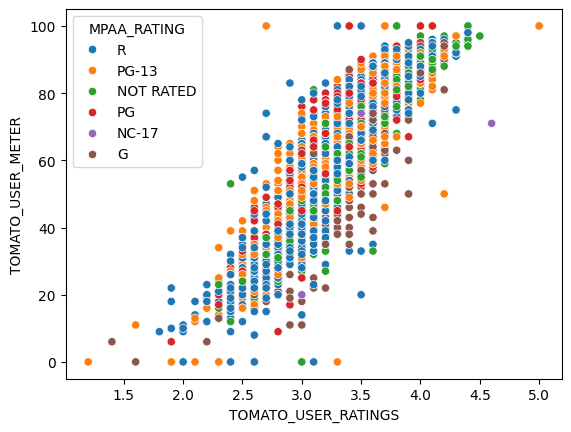

In [18]:
sns.scatterplot(data=asset_data,x = 'TOMATO_USER_RATINGS',y = 'TOMATO_USER_METER',hue='MPAA_RATING')

<Axes: xlabel='TOMATO_USER_RATINGS', ylabel='TOMATO_USER_METER'>

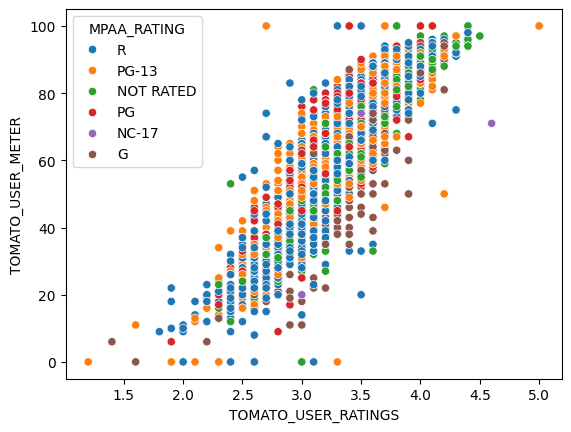

In [19]:
data1 = asset_data[asset_data['MPAA_RATING'].notna()]
sns.scatterplot(data=data1,x = 'TOMATO_USER_RATINGS',y = 'TOMATO_USER_METER',hue='MPAA_RATING')

In [20]:
## Four columns have missing values .Imputing values

asset_data['MPAA_RATING'].value_counts()



MPAA_RATING
R            1996
PG-13         838
PG            501
NOT RATED     423
G             422
NC-17          43
Name: count, dtype: int64

In [21]:
## implementing proportional imputation as mode imputation may increase the large varaible largely
 ## as its already large

category_counts = {
    'R': 1996,
    'PG-13': 838,
    'PG': 501,
    'NOT RATED': 423,
    'G': 422,
    'NC-17': 43
}

# Calculate the total number of non-missing values
total_counts = sum(category_counts.values())

# Calculate the proportion of each category
category_proportions = {k: v / total_counts for k, v in category_counts.items()}

def impute_rating(rating):
    if pd.isnull(rating):
        return random.choices(
            population=list(category_proportions.keys()),
            weights=list(category_proportions.values()),
            k=asset_data['MPAA_RATING'].isna().sum()
        )[0]
    else:
        return rating

asset_data['MPAA_RATING'] = asset_data['MPAA_RATING'].apply(impute_rating)


In [22]:
asset_data['MPAA_RATING'].value_counts()

MPAA_RATING
R            2332
PG-13         966
PG            596
G             499
NOT RATED     489
NC-17          47
Name: count, dtype: int64

In [23]:
asset_data.isna().sum()

ASSET_ID                 0
RELEASE_YEAR             1
MPAA_RATING              0
GENRE                    9
IMDB_RATING              0
IMDB_VOTES               0
Oscar-Nomination         0
Oscar-Wins               0
Other - Nominations      0
Other - Wins             0
TOMATO_USER_METER      164
TOMATO_USER_RATINGS      0
TOMATO_USER_REVIEWS      0
dtype: int64

In [24]:
## imputing the other values with mean and mode for respective columns

asset_data.loc[asset_data['TOMATO_USER_METER'].isna(),'TOMATO_USER_METER'] = round(asset_data['TOMATO_USER_METER'].mean(),2)
asset_data.loc[asset_data['GENRE'].isna(),'GENRE'] = asset_data['GENRE'].mode()[0]
asset_data.loc[asset_data['RELEASE_YEAR'].isna(),'RELEASE_YEAR'] = asset_data['RELEASE_YEAR'].mode()[0]

In [25]:
## Exploring schedule data
schedule_data.dtypes

ASSET_ID                    int64
AIRING_START_DATE_TIME     object
AIRING_END_DATE_TIME       object
PREMIER_AIRING              int64
EXHIBITION_AIRING           int64
FREE_AIRING                 int64
SCHEDULED_RUNTIME           int64
DAY_PART                   object
AIRING_REVENUE              int64
C3_RATING                 float64
dtype: object

In [26]:
imputer = SimpleImputer(strategy='mean')
schedule_data['C3_RATING'] = imputer.fit_transform(schedule_data[['C3_RATING']])

In [27]:
schedule_data.isna().sum()

ASSET_ID                  0
AIRING_START_DATE_TIME    0
AIRING_END_DATE_TIME      0
PREMIER_AIRING            0
EXHIBITION_AIRING         0
FREE_AIRING               0
SCHEDULED_RUNTIME         0
DAY_PART                  0
AIRING_REVENUE            0
C3_RATING                 0
dtype: int64

In [28]:
schedule_data['ASSET_ID'].value_counts()

ASSET_ID
181142    28
173505    28
174149    27
174683    25
171996    24
          ..
173446     1
173007     1
186982     1
185396     1
173927     1
Name: count, Length: 412, dtype: int64

In [29]:
## joining 2 datasets

final_data = pd.merge(schedule_data , asset_data,how='inner',on='ASSET_ID')

In [30]:
schedule_data.shape

(2517, 10)

In [31]:
final_data.isna().sum()

ASSET_ID                  0
AIRING_START_DATE_TIME    0
AIRING_END_DATE_TIME      0
PREMIER_AIRING            0
EXHIBITION_AIRING         0
FREE_AIRING               0
SCHEDULED_RUNTIME         0
DAY_PART                  0
AIRING_REVENUE            0
C3_RATING                 0
RELEASE_YEAR              0
MPAA_RATING               0
GENRE                     0
IMDB_RATING               0
IMDB_VOTES                0
Oscar-Nomination          0
Oscar-Wins                0
Other - Nominations       0
Other - Wins              0
TOMATO_USER_METER         0
TOMATO_USER_RATINGS       0
TOMATO_USER_REVIEWS       0
dtype: int64

In [32]:
final_data.head()

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,...,GENRE,IMDB_RATING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,Other - Wins,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS
0,174543,9/13/2013 21:15,9/13/2013 23:45,0,1,0,150,Late Fringe,197840,595443.0,...,"Comedy, Crime, Music",7.8,205473,2,0,35,7,89.0,3.7,254542.0
1,181758,9/24/2014 0:00,9/24/2014 3:00,0,0,1,180,Late Night,89818,216841.0,...,"Action, Sci-Fi",8.7,1080566,4,4,40,33,85.0,3.6,33318840.0
2,191074,9/12/2013 14:15,9/12/2013 16:15,0,1,0,120,Daytime,60064,388053.0,...,"Action, Drama, Crime",5.7,19896,0,0,0,0,47.0,2.7,44787.0
3,196156,7/14/2013 18:00,7/14/2013 21:00,1,1,0,180,Early Fringe,164494,670869.0,...,"Action, Adventure, Thriller",8.0,407119,0,0,34,27,89.0,3.9,698710.0
4,174201,11/14/2014 15:30,11/14/2014 17:30,0,0,1,120,Daytime,86961,311122.0,...,"Action, Adventure, Thriller",6.4,87972,3,0,7,1,51.0,2.8,182483.0


## Exploratory Analysis

In [33]:
final_data.columns

Index(['ASSET_ID', 'AIRING_START_DATE_TIME', 'AIRING_END_DATE_TIME',
       'PREMIER_AIRING', 'EXHIBITION_AIRING', 'FREE_AIRING',
       'SCHEDULED_RUNTIME', 'DAY_PART', 'AIRING_REVENUE', 'C3_RATING',
       'RELEASE_YEAR', 'MPAA_RATING', 'GENRE', 'IMDB_RATING', 'IMDB_VOTES',
       'Oscar-Nomination', 'Oscar-Wins', 'Other - Nominations', 'Other - Wins',
       'TOMATO_USER_METER', 'TOMATO_USER_RATINGS', 'TOMATO_USER_REVIEWS'],
      dtype='object')

In [34]:
final_data['GENRE']

0              Comedy, Crime, Music
1                    Action, Sci-Fi
2              Action, Drama, Crime
3       Action, Adventure, Thriller
4       Action, Adventure, Thriller
                   ...             
2462           Comedy, Crime, Music
2463      Horror, Mystery, Thriller
2464         Crime, Drama, Thriller
2465      Adventure, Comedy, Sci-Fi
2466       Comedy, Romance, Western
Name: GENRE, Length: 2467, dtype: object

In [35]:
final_data.head()

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,...,GENRE,IMDB_RATING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,Other - Wins,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS
0,174543,9/13/2013 21:15,9/13/2013 23:45,0,1,0,150,Late Fringe,197840,595443.0,...,"Comedy, Crime, Music",7.8,205473,2,0,35,7,89.0,3.7,254542.0
1,181758,9/24/2014 0:00,9/24/2014 3:00,0,0,1,180,Late Night,89818,216841.0,...,"Action, Sci-Fi",8.7,1080566,4,4,40,33,85.0,3.6,33318840.0
2,191074,9/12/2013 14:15,9/12/2013 16:15,0,1,0,120,Daytime,60064,388053.0,...,"Action, Drama, Crime",5.7,19896,0,0,0,0,47.0,2.7,44787.0
3,196156,7/14/2013 18:00,7/14/2013 21:00,1,1,0,180,Early Fringe,164494,670869.0,...,"Action, Adventure, Thriller",8.0,407119,0,0,34,27,89.0,3.9,698710.0
4,174201,11/14/2014 15:30,11/14/2014 17:30,0,0,1,120,Daytime,86961,311122.0,...,"Action, Adventure, Thriller",6.4,87972,3,0,7,1,51.0,2.8,182483.0


In [36]:
## creating columns from the dates given 

final_data['year']  =   pd.to_datetime(final_data['AIRING_START_DATE_TIME']).dt.year
final_data['month_name']  =   pd.to_datetime(final_data['AIRING_START_DATE_TIME']).dt.month_name()
final_data['weekday_name']  =   pd.to_datetime(final_data['AIRING_START_DATE_TIME']).dt.day_name()
final_data['month']  =   pd.to_datetime(final_data['AIRING_START_DATE_TIME']).dt.month
final_data['weekday']  =   pd.to_datetime(final_data['AIRING_START_DATE_TIME']).dt.day

In [37]:
us_holidays = holidays.US()
def is_holiday(date):
    if date in us_holidays:
        return  0
    else :
        return 1

final_data['is_holiday'] = final_data['AIRING_START_DATE_TIME'].apply(is_holiday)   ## 0-holiday 1 -not holiday

In [38]:
final_data.head()

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,...,Other - Wins,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS,year,month_name,weekday_name,month,weekday,is_holiday
0,174543,9/13/2013 21:15,9/13/2013 23:45,0,1,0,150,Late Fringe,197840,595443.0,...,7,89.0,3.7,254542.0,2013,September,Friday,9,13,1
1,181758,9/24/2014 0:00,9/24/2014 3:00,0,0,1,180,Late Night,89818,216841.0,...,33,85.0,3.6,33318840.0,2014,September,Wednesday,9,24,1
2,191074,9/12/2013 14:15,9/12/2013 16:15,0,1,0,120,Daytime,60064,388053.0,...,0,47.0,2.7,44787.0,2013,September,Thursday,9,12,1
3,196156,7/14/2013 18:00,7/14/2013 21:00,1,1,0,180,Early Fringe,164494,670869.0,...,27,89.0,3.9,698710.0,2013,July,Sunday,7,14,1
4,174201,11/14/2014 15:30,11/14/2014 17:30,0,0,1,120,Daytime,86961,311122.0,...,1,51.0,2.8,182483.0,2014,November,Friday,11,14,1


In [39]:
## creating bins to assigned runtime so to eliminate +1 ,-1 ,+2,-2 minutes to standard values

bins = [75,105,127,143,165,195,215,245,275,305]
label = [90,120,135,150,180,210,240,270,300]                        ## general standard times 
final_data['RUNTIME'] = pd.cut(final_data['SCHEDULED_RUNTIME'], bins=bins,labels=label)

final_data.drop('SCHEDULED_RUNTIME',axis=1,inplace=True)

In [40]:
final_data.sort_values(by='AIRING_START_DATE_TIME',inplace=True)  ## sort based on date so that we can know how the repitation of movie over time is effecting the earnings
final_data['No_of_Repitation'] = final_data.groupby('ASSET_ID').cumcount() + 1

final_data['Year_diff_in_release'] = final_data['year']-final_data['RELEASE_YEAR']

In [41]:
final_data

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,DAY_PART,AIRING_REVENUE,C3_RATING,RELEASE_YEAR,...,TOMATO_USER_REVIEWS,year,month_name,weekday_name,month,weekday,is_holiday,RUNTIME,No_of_Repitation,Year_diff_in_release
658,185482,1/10/2014 11:00,1/10/2014 13:00,1,1,0,Daytime,40981,198145.0,2004.0,...,462648.0,2014,January,Friday,1,10,1,120,1,10.0
1579,172507,1/10/2014 13:00,1/10/2014 15:00,0,0,1,Daytime,39988,285456.0,1983.0,...,53031.0,2014,January,Friday,1,10,1,120,1,31.0
202,185326,1/10/2014 15:00,1/10/2014 17:00,0,0,1,Daytime,76408,282691.0,2006.0,...,341705.0,2014,January,Friday,1,10,1,120,1,8.0
2275,171962,1/10/2014 17:00,1/10/2014 20:00,0,0,1,Early Fringe,189882,490824.0,2001.0,...,904029.0,2014,January,Friday,1,10,1,180,1,13.0
1392,172507,1/10/2014 1:00,1/10/2014 3:00,0,1,0,Late Night,18641,263479.0,1983.0,...,53031.0,2014,January,Friday,1,10,1,120,2,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,185324,9/9/2014 15:00,9/9/2014 17:30,0,0,1,Daytime,80871,270558.0,2001.0,...,32598854.0,2014,September,Tuesday,9,9,1,150,17,13.0
1367,174909,9/9/2014 1:00,9/9/2014 3:30,1,1,0,Late Night,27027,294463.0,2002.0,...,56556.0,2014,September,Tuesday,9,9,1,150,10,12.0
2264,181146,9/9/2014 20:00,9/9/2014 22:00,0,1,0,Late Fringe,121714,544340.0,1997.0,...,1046080.0,2014,September,Tuesday,9,9,1,120,19,17.0
2179,172263,9/9/2014 3:30,9/9/2014 5:45,1,1,0,Late Night,14649,179037.0,1996.0,...,10746.0,2014,September,Tuesday,9,9,1,135,1,18.0


In [42]:
final_data.columns

Index(['ASSET_ID', 'AIRING_START_DATE_TIME', 'AIRING_END_DATE_TIME',
       'PREMIER_AIRING', 'EXHIBITION_AIRING', 'FREE_AIRING', 'DAY_PART',
       'AIRING_REVENUE', 'C3_RATING', 'RELEASE_YEAR', 'MPAA_RATING', 'GENRE',
       'IMDB_RATING', 'IMDB_VOTES', 'Oscar-Nomination', 'Oscar-Wins',
       'Other - Nominations', 'Other - Wins', 'TOMATO_USER_METER',
       'TOMATO_USER_RATINGS', 'TOMATO_USER_REVIEWS', 'year', 'month_name',
       'weekday_name', 'month', 'weekday', 'is_holiday', 'RUNTIME',
       'No_of_Repitation', 'Year_diff_in_release'],
      dtype='object')

## Exploring Dataset

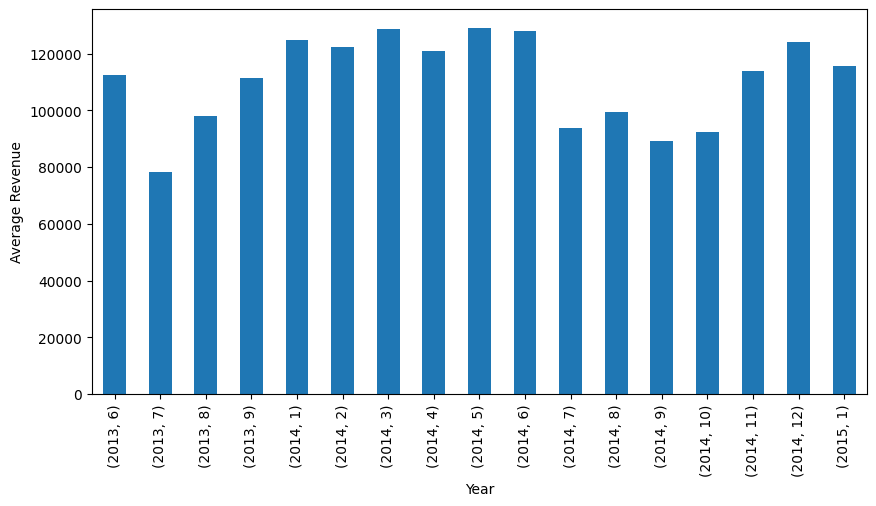

In [43]:
plt.figure(figsize=(10,5))
final_data.groupby(['year','month'])['AIRING_REVENUE'].mean().plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.show()

In [44]:
pd.to_datetime(final_data['AIRING_START_DATE_TIME']).max()

Timestamp('2015-01-25 22:30:00')

In [45]:
mean_avg =  final_data.groupby('year')['AIRING_REVENUE'].mean()
per_increase =  mean_avg.pct_change()*100
print(per_increase)


year
2013          NaN
2014    16.842420
2015     2.273497
Name: AIRING_REVENUE, dtype: float64


The given data is between 2013-06-26 and 2015-01-25. 

<Axes: xlabel='IMDB_VOTES', ylabel='Count'>

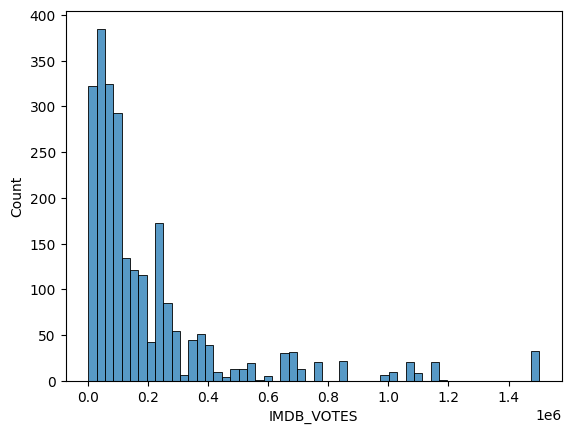

In [46]:
sns.histplot(data=final_data,x='IMDB_VOTES')

<Axes: xlabel='IMDB_VOTES', ylabel='AIRING_REVENUE'>

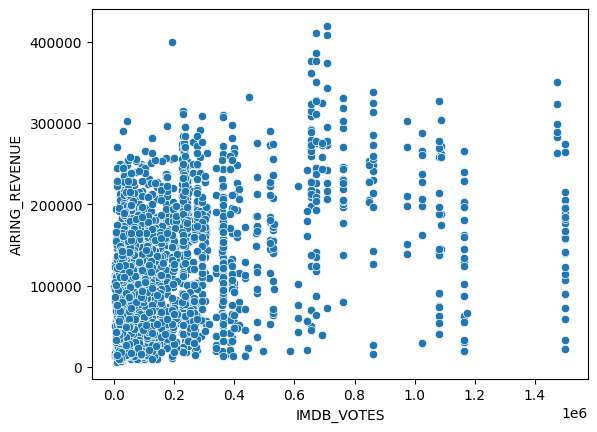

In [47]:
sns.scatterplot(data=final_data,x='IMDB_VOTES',y='AIRING_REVENUE')

<Axes: xlabel='AIRING_REVENUE', ylabel='Count'>

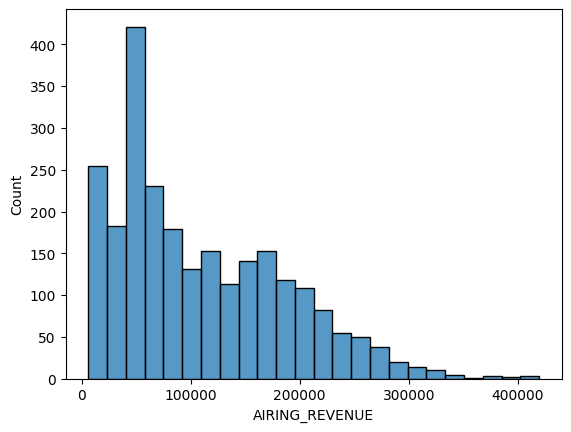

In [48]:
sns.histplot(data=final_data,x='AIRING_REVENUE')

## Building Regression model

In [49]:
cat_var = final_data.select_dtypes('object').columns.to_list()
num_var = final_data.select_dtypes(['int64','float64']).columns.to_list()

In [50]:
cat_var

['AIRING_START_DATE_TIME',
 'AIRING_END_DATE_TIME',
 'DAY_PART',
 'MPAA_RATING',
 'GENRE',
 'month_name',
 'weekday_name']

In [51]:
final2 = final_data
final_data.drop(['ASSET_ID','AIRING_START_DATE_TIME','AIRING_END_DATE_TIME','year','RELEASE_YEAR','month_name','weekday_name'],axis=1,inplace=True)

In [52]:
final_data

,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,DAY_PART,AIRING_REVENUE,C3_RATING,MPAA_RATING,GENRE,IMDB_RATING,IMDB_VOTES,...,Other - Wins,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS,month,weekday,is_holiday,RUNTIME,No_of_Repitation,Year_diff_in_release
658,1,1,0,Daytime,40981,198145.0,PG-13,"Comedy, Romance",5.9,100351,...,1,47.0,3.1,462648.0,1,10,1,120,1,10.0
1579,0,0,1,Daytime,39988,285456.0,R,"Horror, Thriller",6.0,23749,...,1,45.0,3.0,53031.0,1,10,1,120,1,31.0
202,0,0,1,Daytime,76408,282691.0,PG-13,"Action, Adventure, Drama",5.6,77616,...,0,43.0,2.9,341705.0,1,10,1,120,1,8.0
2275,0,0,1,Early Fringe,189882,490824.0,PG-13,"Action, Drama, Romance",6.0,232895,...,10,67.0,3.3,904029.0,1,10,1,180,1,13.0
1392,0,1,0,Late Night,18641,263479.0,R,"Horror, Thriller",6.0,23749,...,1,45.0,3.0,53031.0,1,10,1,120,2,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0,0,1,Daytime,80871,270558.0,PG-13,"Crime, Thriller",7.8,360801,...,4,79.0,3.6,32598854.0,9,9,1,150,17,13.0
1367,1,1,0,Late Night,27027,294463.0,PG-13,"Action, Adventure, Comedy",5.6,37967,...,0,36.0,2.8,56556.0,9,9,1,150,10,12.0
2264,0,1,0,Late Fringe,121714,544340.0,PG-13,"Comedy, Sci-Fi",7.2,363455,...,18,79.0,3.5,1046080.0,9,9,1,120,19,17.0
2179,1,1,0,Late Night,14649,179037.0,R,"Comedy, Crime, Drama",5.4,8739,...,0,27.0,2.7,10746.0,9,9,1,135,1,18.0


In [53]:
final_data.dtypes

PREMIER_AIRING             int64
EXHIBITION_AIRING          int64
FREE_AIRING                int64
DAY_PART                  object
AIRING_REVENUE             int64
C3_RATING                float64
MPAA_RATING               object
GENRE                     object
IMDB_RATING              float64
IMDB_VOTES                 int64
Oscar-Nomination           int64
Oscar-Wins                 int64
Other - Nominations        int64
Other - Wins               int64
TOMATO_USER_METER        float64
TOMATO_USER_RATINGS      float64
TOMATO_USER_REVIEWS      float64
month                      int32
weekday                    int32
is_holiday                 int64
RUNTIME                 category
No_of_Repitation           int64
Year_diff_in_release     float64
dtype: object

In [54]:
## Building model

encoded_columns = pd.get_dummies(final_data['DAY_PART'], prefix='DAY_PART',dtype=int)

final_data = pd.concat([final_data, encoded_columns], axis=1)

final_data.drop('DAY_PART', axis=1, inplace=True)


encoded_columns = pd.get_dummies(final_data['MPAA_RATING'], prefix='MPAA_RATING',dtype=int)

final_data = pd.concat([final_data, encoded_columns], axis=1)

final_data.drop('MPAA_RATING', axis=1, inplace=True)

In [55]:
## separating genres into separate columns and deleting genre column

final_data['GENRE'] = final_data['GENRE'].str.replace(' ','')

mlb = MultiLabelBinarizer()
a = pd.DataFrame(mlb.fit_transform(final_data['GENRE'].apply(lambda x: x.split(','))),columns=mlb.classes_,index=final_data.index)
final_data = final_data.join(a)

final_data.drop('GENRE',axis=1,inplace=True)

In [56]:
## going for cycling encoding as month and weekday are cyclic in nature december is close to january

final_data['month_sin'] = np.sin(2 * np.pi * final_data['month']/12)
final_data['month_cos'] = np.cos(2 * np.pi * final_data['month']/12)
final_data['weekday_sin'] = np.sin(2 * np.pi * final_data['weekday']/7)
final_data['weekday_cos'] = np.cos(2 * np.pi * final_data['weekday']/7)

final_data.drop(['month','weekday'],axis=1,inplace=True)


In [57]:
final_data['RUNTIME'] = final_data['RUNTIME'].astype('int64')

In [58]:
final_data

,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,AIRING_REVENUE,C3_RATING,IMDB_RATING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,...,Romance,Sci-Fi,Sport,Thriller,War,Western,month_sin,month_cos,weekday_sin,weekday_cos
658,1,1,0,40981,198145.0,5.9,100351,0,0,8,...,1,0,0,0,0,0,0.5,8.660254e-01,0.433884,-0.900969
1579,0,0,1,39988,285456.0,6.0,23749,0,0,3,...,0,0,0,1,0,0,0.5,8.660254e-01,0.433884,-0.900969
202,0,0,1,76408,282691.0,5.6,77616,1,0,5,...,0,0,0,0,0,0,0.5,8.660254e-01,0.433884,-0.900969
2275,0,0,1,189882,490824.0,6.0,232895,1,1,42,...,1,0,0,0,0,0,0.5,8.660254e-01,0.433884,-0.900969
1392,0,1,0,18641,263479.0,6.0,23749,0,0,3,...,0,0,0,1,0,0,0.5,8.660254e-01,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0,0,1,80871,270558.0,7.8,360801,0,0,18,...,0,0,0,1,0,0,-1.0,-1.836970e-16,0.974928,-0.222521
1367,1,1,0,27027,294463.0,5.6,37967,0,0,0,...,0,0,0,0,0,0,-1.0,-1.836970e-16,0.974928,-0.222521
2264,0,1,0,121714,544340.0,7.2,363455,1,1,38,...,0,1,0,0,0,0,-1.0,-1.836970e-16,0.974928,-0.222521
2179,1,1,0,14649,179037.0,5.4,8739,0,0,0,...,0,0,0,0,0,0,-1.0,-1.836970e-16,0.974928,-0.222521


In [59]:
cols = ['C3_RATING','IMDB_VOTES','TOMATO_USER_METER','TOMATO_USER_REVIEWS','Year_diff_in_release']

In [60]:
Q1 = np.percentile(final_data['TOMATO_USER_REVIEWS'],25)
Q3 = np.percentile(final_data['TOMATO_USER_REVIEWS'],75)
IQR = Q3-Q1

LL = Q1 - 1.5*IQR
UL = Q3 + 1.5*IQR

final_data.loc[final_data['TOMATO_USER_REVIEWS']<LL,'TOMATO_USER_REVIEWS'] = LL
final_data.loc[final_data['TOMATO_USER_REVIEWS']>UL,'TOMATO_USER_REVIEWS'] = UL

In [61]:
final_data['C3_RATING'].to_list()

[198145.0,
 285456.0,
 282691.0,
 490824.0,
 263479.0,
 967416.0,
 242601.0,
 165014.0,
 728030.0,
 402547.0,
 673330.0,
 520927.0,
 227530.0,
 627337.0,
 1024424.0,
 922961.0,
 616258.0,
 680505.0,
 501522.0,
 216881.0,
 267592.0,
 461796.0,
 445702.0,
 478570.0,
 417217.0,
 550170.0,
 722975.0,
 981757.0,
 790202.0,
 632317.0,
 536942.0,
 334279.0,
 283398.0,
 248211.0,
 379170.0,
 161666.0,
 278759.0,
 354132.0,
 493312.0,
 506304.0,
 206601.0,
 318847.0,
 430293.0,
 330931.0,
 199304.0,
 319825.0,
 381917.0,
 302429.0,
 399520.0,
 412776.0,
 525986.0,
 574113.0,
 177796.0,
 264340.0,
 255914.0,
 298164.0,
 305002.0,
 237521.0,
 409715.0,
 609799.0,
 515024.0,
 327476.0,
 258928.0,
 179619.0,
 835748.0,
 260156.0,
 170815.0,
 233335.0,
 171407.0,
 354797.0,
 868839.0,
 521778.0,
 241542.0,
 240808.0,
 337586.0,
 300209.0,
 327831.0,
 563801.0,
 576183.0,
 262507.0,
 176827.0,
 192297.0,
 286238.0,
 262247.0,
 413602.0,
 285582.0,
 588278.0,
 531881.0,
 916833.0,
 596726.0,
 533680.0

In [62]:
scaler = MinMaxScaler()
final_data['C3_RATING'] = scaler.fit_transform(np.array(final_data['C3_RATING']).reshape(-1, 1))

In [63]:
## normalizing columns as they donot follow gaussian distribution
scaler = MinMaxScaler()
for col in cols:
    final_data[col] = scaler.fit_transform(np.array(final_data[col]).reshape(-1, 1))


<Axes: ylabel='IMDB_VOTES'>

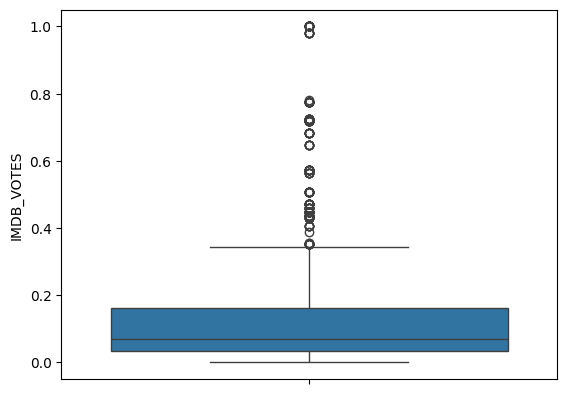

In [64]:
sns.boxplot(final_data[final_data['IMDB_VOTES']<700000]['IMDB_VOTES'])

In [65]:
final_data[cols]

,C3_RATING,IMDB_VOTES,TOMATO_USER_METER,TOMATO_USER_REVIEWS,Year_diff_in_release
658,0.085418,0.066466,0.47,0.372019,0.088608
1579,0.144320,0.015444,0.45,0.042623,0.354430
202,0.142454,0.051323,0.43,0.274762,0.063291
2275,0.282865,0.154750,0.67,0.726957,0.126582
1392,0.129493,0.015444,0.45,0.042623,0.354430
...,...,...,...,...,...
663,0.134269,0.239944,0.79,1.000000,0.126582
1367,0.150396,0.024914,0.36,0.045458,0.113924
2264,0.318968,0.241712,0.79,0.841188,0.177215
2179,0.072527,0.005446,0.27,0.008620,0.189873


In [66]:
final_data.columns

Index(['PREMIER_AIRING', 'EXHIBITION_AIRING', 'FREE_AIRING', 'AIRING_REVENUE',
       'C3_RATING', 'IMDB_RATING', 'IMDB_VOTES', 'Oscar-Nomination',
       'Oscar-Wins', 'Other - Nominations', 'Other - Wins',
       'TOMATO_USER_METER', 'TOMATO_USER_RATINGS', 'TOMATO_USER_REVIEWS',
       'is_holiday', 'RUNTIME', 'No_of_Repitation', 'Year_diff_in_release',
       'DAY_PART_Breakfast', 'DAY_PART_Daytime', 'DAY_PART_Early Fringe',
       'DAY_PART_Early Morning', 'DAY_PART_Late Fringe', 'DAY_PART_Late Night',
       'MPAA_RATING_G', 'MPAA_RATING_NC-17', 'MPAA_RATING_NOT RATED',
       'MPAA_RATING_PG', 'MPAA_RATING_PG-13', 'MPAA_RATING_R', 'Action',
       'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'month_sin',
       'month_cos', 'weekday_sin', 'weekday_cos'],
      dtype='object')

In [67]:
y = final_data['AIRING_REVENUE'].values
X = final_data.drop('AIRING_REVENUE',axis=1).values

In [68]:
y

array([ 40981,  39988,  76408, ..., 121714,  14649,  49013])

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [71]:
from sklearn.metrics import mean_squared_error , r2_score
y_pred = linear.predict(X_test)


In [72]:
print("Mean squared error:", mean_squared_error(y_test, y_pred))

print("Coefficient of determination (R^2):", r2_score(y_test, y_pred))

Mean squared error: 1332818094.645125
Coefficient of determination (R^2): 0.7832936657033497


Text(0, 0.5, 'residual(y_pred-y_test)')

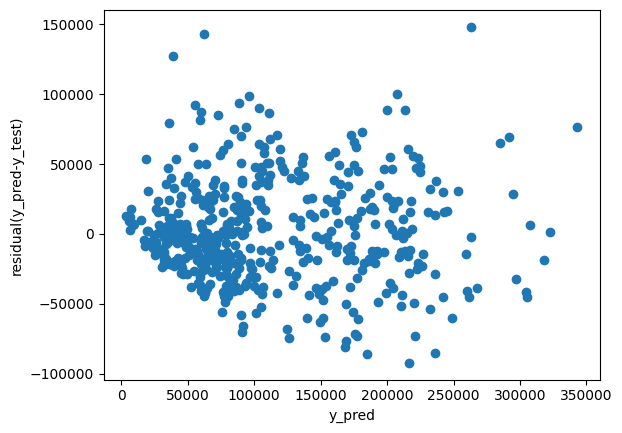

In [73]:
plt.scatter(y=(y_test-y_pred),x=y_pred)
plt.xlabel('y_pred')
plt.ylabel('residual(y_pred-y_test)')

In [74]:
## higher polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 


degree = 3
polyreg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model.fit(X_train, y_train)
y_pred = polyreg_model.predict(X_test)

In [75]:
print("Mean squared error:", mean_squared_error(y_test, y_pred))

print("Coefficient of determination (R^2):", r2_score(y_test, y_pred))

Mean squared error: 118281598009.45831
Coefficient of determination (R^2): -18.23171033043676


In [76]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=4.5)                    ## increasing value is reducing r2 score and decreasing makes results not to converge
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)


In [77]:
print("Mean squared error:", mean_squared_error(y_test, y_pred_lasso))

print("Coefficient of determination (R^2):", r2_score(y_test, y_pred_lasso))

Mean squared error: 1332350099.8411682
Coefficient of determination (R^2): 0.7833697581865195


In [78]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=5)                         ## increasing value is reducing r2 score and decreasing makes results not to converge
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)             

In [79]:
print("Mean squared error:", mean_squared_error(y_test, y_pred_ridge))

print("Coefficient of determination (R^2):", r2_score(y_test, y_pred_ridge))

Mean squared error: 1332542861.2537372
Coefficient of determination (R^2): 0.7833384166108915


In [80]:
from sklearn.linear_model import ElasticNet

net = ElasticNet(alpha=5,l1_ratio=0.5)
net.fit(X_train,y_train)
y_pred_net = net.predict(X_test)

In [81]:
print("Mean squared error:", mean_squared_error(y_test, y_pred_net))

print("Coefficient of determination (R^2):", r2_score(y_test, y_pred_net))

Mean squared error: 3936057301.4614167
Coefficient of determination (R^2): 0.36002628355043453


## Case-2

In [190]:
schedule_data2 = schedule_data
schedule_data.head()

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING
0,174543,9/13/2013 21:15,9/13/2013 23:45,0,1,0,150,Late Fringe,197840,595443.0
1,181758,9/24/2014 0:00,9/24/2014 3:00,0,0,1,180,Late Night,89818,216841.0
2,191074,9/12/2013 14:15,9/12/2013 16:15,0,1,0,120,Daytime,60064,388053.0
3,196156,7/14/2013 18:00,7/14/2013 21:00,1,1,0,180,Early Fringe,164494,670869.0
4,174201,11/14/2014 15:30,11/14/2014 17:30,0,0,1,120,Daytime,86961,311122.0


In [191]:
asset_data2 = asset_data
asset_data.head()

,ASSET_ID,RELEASE_YEAR,MPAA_RATING,GENRE,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,...,TOMATO_METER,TOMATO_RATING,TOMATO_REVIEWS,TOMATO_FRESH,TOMATO_ROTTEN,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS,TOMATO_IMAGE,BOX_OFFICE_EARNINGS
0,204750,2011.0,R,"Comedy, Thriller",6.2,46.0,14995,0,0,0,...,33.0,4.8,55.0,18.0,37.0,36.0,3.0,14994.0,rotten,"$94,700,000"
1,172902,2002.0,R,"Action, Sci-Fi, Sport",2.9,14.0,21493,0,0,2,...,3.0,2.6,117.0,4.0,113.0,14.0,2.1,36746.0,rotten,"$18,900,000"
2,198131,2007.0,PG-13,"Adventure, Comedy",2.3,17.0,84743,0,0,3,...,2.0,2.3,64.0,1.0,63.0,29.0,2.4,560170.0,rotten,"$39,700,000"
3,195393,2006.0,PG-13,"Comedy, Drama, Romance",6.8,62.0,254029,2,0,37,...,75.0,6.7,187.0,141.0,46.0,76.0,3.6,570016.0,certified,"$124,700,000"
4,185444,2002.0,R,"Horror, Mystery",5.4,28.0,70668,0,0,1,...,14.0,3.8,124.0,17.0,107.0,38.0,2.8,376512.0,rotten,"$30,100,000"


In [192]:
asset_data = asset_data.dropna(thresh=asset_data.shape[1] - 6)

In [193]:
asset_data.shape

(3913, 21)

(array([  14.,   36.,  130.,  211.,  407., 1957.,  527.,  364.,  231.,
          36.]),
 array([  5. ,  14.5,  24. ,  33.5,  43. ,  52.5,  62. ,  71.5,  81. ,
         90.5, 100. ]),
 <BarContainer object of 10 artists>)

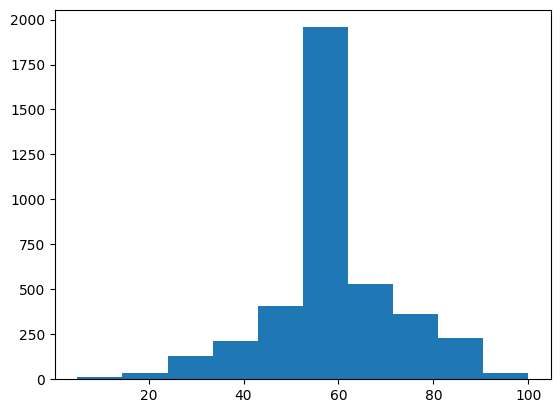

In [234]:
plt.hist(asset_data['IMDB_RANKING'])

In [154]:
asset_data.drop('BOX_OFFICE_EARNINGS',axis=1,inplace=True)


In [233]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(asset_data[['IMDB_RANKING']])

asset_data.loc[:,'IMDB_RANKING'] = imputer.transform(asset_data[['IMDB_RANKING']])

In [256]:
asset_data.loc[asset_data['MPAA_RATING'].isna(),'MPAA_RATING'] = asset_data['MPAA_RATING'].mode()[0]
asset_data.loc[asset_data['GENRE'].isna(),'GENRE'] = asset_data['GENRE'].mode()[0]
asset_data.loc[asset_data['TOMATO_METER'].isna(),'TOMATO_METER'] = round(asset_data['TOMATO_METER'].mean(),1)
asset_data.loc[asset_data['TOMATO_RATING'].isna(),'TOMATO_RATING'] = round(asset_data['TOMATO_RATING'].mean(),1)
asset_data.loc[asset_data['TOMATO_USER_METER'].isna(),'TOMATO_USER_METER'] = round(asset_data['TOMATO_USER_METER'].mean(),1)
asset_data.loc[asset_data['TOMATO_IMAGE'].isna(),'TOMATO_IMAGE'] = asset_data['TOMATO_IMAGE'].mode()[0]

In [257]:
asset_data.isna().sum()

ASSET_ID               0
RELEASE_YEAR           0
MPAA_RATING            0
GENRE                  0
IMDB_RATING            0
IMDB_RANKING           0
IMDB_VOTES             0
Oscar-Nomination       0
Oscar-Wins             0
Other - Nominations    0
Other - Wins           0
TOMATO_METER           0
TOMATO_RATING          0
TOMATO_REVIEWS         0
TOMATO_FRESH           0
TOMATO_ROTTEN          0
TOMATO_USER_METER      0
TOMATO_USER_RATINGS    0
TOMATO_USER_REVIEWS    0
TOMATO_IMAGE           0
dtype: int64

In [263]:
## standardizing the mpaa rating column

asset_data.loc[asset_data['MPAA_RATING'] == 'Unrated' ,'MPAA_RATING'] = 'NOT RATED'
asset_data.loc[asset_data['MPAA_RATING'] == 'Not Rated' ,'MPAA_RATING'] = 'NOT RATED'
asset_data.loc[asset_data['MPAA_RATING'] == 'UNRATED' ,'MPAA_RATING'] = 'NOT RATED'

# M was changed to GP and then to PG and X with NC -17

asset_data.loc[asset_data['MPAA_RATING'] == 'M' ,'MPAA_RATING'] = 'PG'
asset_data.loc[asset_data['MPAA_RATING'] == 'GP' ,'MPAA_RATING'] = 'PG'
asset_data.loc[asset_data['MPAA_RATING'] == 'X' ,'MPAA_RATING'] = 'NC-17'

## Based on domain knowledge some of the tv ratings can be converted to MPAA ratings for standard format

asset_data.loc[asset_data['MPAA_RATING'] == 'TV-MA' ,'MPAA_RATING'] = 'NC-17'
asset_data.loc[asset_data['MPAA_RATING'] == 'TV-14' ,'MPAA_RATING'] = 'PG-13'
asset_data.loc[asset_data['MPAA_RATING'] == 'TV-PG' ,'MPAA_RATING'] = 'PG'
asset_data.loc[asset_data['MPAA_RATING'] == 'TV-G' ,'MPAA_RATING'] = 'G'

## Considering approved and passed in the old system and only general movies are produced at that time we can convert to G of modern system
asset_data.loc[asset_data['MPAA_RATING'] == 'APPROVED' ,'MPAA_RATING'] = 'G'
asset_data.loc[asset_data['MPAA_RATING'] == 'PASSED' ,'MPAA_RATING'] = 'G'


In [259]:
schedule_data.shape

(2517, 10)

In [261]:
schedule_data.loc[schedule_data['C3_RATING'].isna(),'C3_RATING'] = round(schedule_data['C3_RATING'].mean(),1)

In [264]:
final_data2 = pd.merge(schedule_data , asset_data,how='inner',on='ASSET_ID')

In [265]:
final_data2.shape

(2356, 29)

In [267]:
final_data2.head()

,ASSET_ID,AIRING_START_DATE_TIME,AIRING_END_DATE_TIME,PREMIER_AIRING,EXHIBITION_AIRING,FREE_AIRING,SCHEDULED_RUNTIME,DAY_PART,AIRING_REVENUE,C3_RATING,...,Other - Wins,TOMATO_METER,TOMATO_RATING,TOMATO_REVIEWS,TOMATO_FRESH,TOMATO_ROTTEN,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS,TOMATO_IMAGE
0,174543,9/13/2013 21:15,9/13/2013 23:45,0,1,0,150,Late Fringe,197840,595443.0,...,7,77.0,7.1,148.0,114.0,34.0,89.0,3.7,254542.0,certified
1,181758,9/24/2014 0:00,9/24/2014 3:00,0,0,1,180,Late Night,89818,216841.0,...,33,87.0,7.6,139.0,121.0,18.0,85.0,3.6,33318840.0,certified
2,191074,9/12/2013 14:15,9/12/2013 16:15,0,1,0,120,Daytime,60064,388053.0,...,0,33.0,3.7,12.0,4.0,8.0,47.0,2.7,44787.0,rotten
3,196156,7/14/2013 18:00,7/14/2013 21:00,1,1,0,180,Early Fringe,164494,670869.0,...,27,95.0,7.8,222.0,210.0,12.0,89.0,3.9,698710.0,certified
4,174201,11/14/2014 15:30,11/14/2014 17:30,0,0,1,120,Daytime,86961,311122.0,...,1,69.0,6.2,49.0,34.0,15.0,51.0,2.8,182483.0,fresh


In [271]:
pd.to_datetime(final_data2['AIRING_START_DATE_TIME']).dt.weekday

0       4
1       2
2       3
3       6
4       4
       ..
2351    3
2352    5
2353    2
2354    3
2355    5
Name: AIRING_START_DATE_TIME, Length: 2356, dtype: int32

In [268]:
final_data2['year']        =   pd.to_datetime(final_data2['AIRING_START_DATE_TIME']).dt.year
final_data2['month']       =   pd.to_datetime(final_data2['AIRING_START_DATE_TIME']).dt.month
final_data2['weekday']     =   pd.to_datetime(final_data2['AIRING_START_DATE_TIME']).dt.weekday


final_data2['Year_diff_in_release'] = final_data2['year']-final_data2['RELEASE_YEAR']

In [270]:
final_data2.columns

Index(['ASSET_ID', 'AIRING_START_DATE_TIME', 'AIRING_END_DATE_TIME',
       'PREMIER_AIRING', 'EXHIBITION_AIRING', 'FREE_AIRING',
       'SCHEDULED_RUNTIME', 'DAY_PART', 'AIRING_REVENUE', 'C3_RATING',
       'RELEASE_YEAR', 'MPAA_RATING', 'GENRE', 'IMDB_RATING', 'IMDB_RANKING',
       'IMDB_VOTES', 'Oscar-Nomination', 'Oscar-Wins', 'Other - Nominations',
       'Other - Wins', 'TOMATO_METER', 'TOMATO_RATING', 'TOMATO_REVIEWS',
       'TOMATO_FRESH', 'TOMATO_ROTTEN', 'TOMATO_USER_METER',
       'TOMATO_USER_RATINGS', 'TOMATO_USER_REVIEWS', 'TOMATO_IMAGE', 'year',
       'month', 'weekday', 'Year_diff_in_release'],
      dtype='object')

In [273]:
final_data2.drop(['ASSET_ID','AIRING_START_DATE_TIME','AIRING_END_DATE_TIME','RELEASE_YEAR','year'],axis=1,inplace=True)

In [276]:
## separating genres into separate columns and deleting genre column

final_data2['GENRE'] = final_data2['GENRE'].str.replace(' ','')

mlb = MultiLabelBinarizer()
a = pd.DataFrame(mlb.fit_transform(final_data2['GENRE'].apply(lambda x: x.split(','))),columns=mlb.classes_,index=final_data2.index)
final_data2 = final_data2.join(a)

final_data2.drop('GENRE',axis=1,inplace=True)

In [277]:
## Building model

encoded_columns = pd.get_dummies(final_data2['DAY_PART'], prefix='DAY_PART',dtype=int)

final_data2 = pd.concat([final_data2, encoded_columns], axis=1)

final_data2.drop('DAY_PART', axis=1, inplace=True)


encoded_columns1 = pd.get_dummies(final_data2['MPAA_RATING'], prefix='MPAA_RATING',dtype=int)

final_data2 = pd.concat([final_data2, encoded_columns1], axis=1)

final_data2.drop('MPAA_RATING', axis=1, inplace=True)


encoded_columns2 = pd.get_dummies(final_data2['TOMATO_IMAGE'], prefix='TOMATO_IMAGE',dtype=int)

final_data2 = pd.concat([final_data2, encoded_columns2], axis=1)

final_data2.drop('TOMATO_IMAGE', axis=1, inplace=True)

In [278]:
final_data2.dtypes

PREMIER_AIRING              int64
EXHIBITION_AIRING           int64
FREE_AIRING                 int64
SCHEDULED_RUNTIME           int64
AIRING_REVENUE              int64
C3_RATING                 float64
IMDB_RATING               float64
IMDB_RANKING              float64
IMDB_VOTES                  int64
Oscar-Nomination            int64
Oscar-Wins                  int64
Other - Nominations         int64
Other - Wins                int64
TOMATO_METER              float64
TOMATO_RATING             float64
TOMATO_REVIEWS            float64
TOMATO_FRESH              float64
TOMATO_ROTTEN             float64
TOMATO_USER_METER         float64
TOMATO_USER_RATINGS       float64
TOMATO_USER_REVIEWS       float64
month                       int32
weekday                     int32
Year_diff_in_release      float64
Action                      int64
Adventure                   int64
Biography                   int64
Comedy                      int64
Crime                       int64
Drama         

In [337]:
final_data2 = final_data2[final_data2['C3_RATING']<1200000]
final_data2 = final_data2[final_data2['IMDB_VOTES']<800000]
final_data2 = final_data2[final_data2['TOMATO_USER_REVIEWS']<500000]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8080062270>,
 'caps': [<matplotlib.lines.Line2D at 0x7f80800627b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8080061f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8080062d80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8080063050>],
 'means': []}

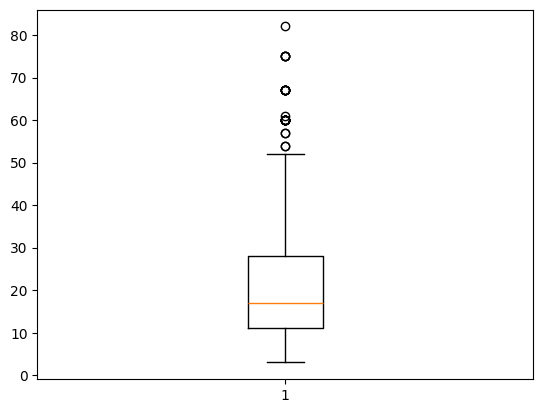

In [339]:
plt.boxplot(data=final_data2,x='Year_diff_in_release')

In [340]:
final_data2.corrwith(final_data2['AIRING_REVENUE']).sort_values()

DAY_PART_Late Night      -0.349297
DAY_PART_Breakfast       -0.199827
DAY_PART_Early Morning   -0.161603
DAY_PART_Daytime         -0.099858
Horror                   -0.091705
MPAA_RATING_PG-13        -0.082134
Mystery                  -0.075784
TOMATO_IMAGE_rotten      -0.070202
Comedy                   -0.068810
TOMATO_ROTTEN            -0.054521
Romance                  -0.054360
Thriller                 -0.045727
FREE_AIRING              -0.040709
MPAA_RATING_NC-17        -0.038054
Sport                    -0.022615
MPAA_RATING_R            -0.019714
War                      -0.013301
Sci-Fi                   -0.007761
Crime                    -0.005167
TOMATO_IMAGE_fresh       -0.000548
Music                    -0.000061
Musical                   0.013917
MPAA_RATING_PG            0.033825
EXHIBITION_AIRING         0.040709
Adventure                 0.044578
Drama                     0.044663
month                     0.045310
Year_diff_in_release      0.046375
Other - Wins        

In [369]:
X = final_data2.drop(['AIRING_REVENUE','IMDB_RANKING'],axis=1).values
y = final_data2['AIRING_REVENUE'].values

In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [355]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [358]:
final_data2.columns

Index(['PREMIER_AIRING', 'EXHIBITION_AIRING', 'FREE_AIRING',
       'SCHEDULED_RUNTIME', 'AIRING_REVENUE', 'C3_RATING', 'IMDB_RATING',
       'IMDB_RANKING', 'IMDB_VOTES', 'Oscar-Nomination', 'Oscar-Wins',
       'Other - Nominations', 'Other - Wins', 'TOMATO_METER', 'TOMATO_RATING',
       'TOMATO_REVIEWS', 'TOMATO_FRESH', 'TOMATO_ROTTEN', 'TOMATO_USER_METER',
       'TOMATO_USER_RATINGS', 'TOMATO_USER_REVIEWS', 'month', 'weekday',
       'Year_diff_in_release', 'Action', 'Adventure', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'DAY_PART_Breakfast', 'DAY_PART_Daytime',
       'DAY_PART_Early Fringe', 'DAY_PART_Early Morning',
       'DAY_PART_Late Fringe', 'DAY_PART_Late Night', 'MPAA_RATING_G',
       'MPAA_RATING_NC-17', 'MPAA_RATING_NOT RATED', 'MPAA_RATING_PG',
       'MPAA_RATING_PG-13', 'MPAA_RATING_R', 'TOMATO_IMAGE_certified',
 

In [372]:
columns_to_standardize = [3,4,5,6,11,12,13,14,15,16,17,18]


preprocessor = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), columns_to_standardize)
    ],
    remainder='passthrough'  # Leave the non-specified columns unchanged
)

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the training data
X_train_transformed = pipeline.fit_transform(X_train)

X_test_transformed = pipeline.transform(X_test)

In [373]:
X_train_transformed[0]

array([ 0.5948483 , -0.74512513,  1.17537407, -0.80061683,  0.79766185,
        0.61619476, -0.79502269, -0.4323098 , -0.79781927,  1.40691425,
        1.47410772, -1.06154211,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 12.        ,
        1.        , 60.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ])

In [363]:
linear = LinearRegression()
linear.fit(X_train_transformed,y_train)
y_pred = linear.predict(X_test_transformed)

print("Mean squared error:", mean_squared_error(y_test, y_pred))

print("Coefficient of determination (R^2):", r2_score(y_test, y_pred))

Mean squared error: 1187842554.075157
Coefficient of determination (R^2): 0.7243563135315216


In [ ]:
import pandas as pd
import statsmodels.api as sm

data_numeric = df.select_dtypes(include=['float64', 'int64'])

# Define independent variables (X) and dependent variable (y)
X = data_numeric.drop(columns=['price'])  # Independent variables
y = data_numeric['price']  # Dependent variable

# Step 1: Fit the full model
X = sm.add_constant(X)  # Add constant for the intercept term
model = sm.OLS(y, X).fit()

# Step 2: Perform backward elimination
while True:
    p_values = model.pvalues[1:]  # Exclude the constant term
    max_p_value = p_values.max()
    if max_p_value > 0.05:  # If the highest p-value is greater than 0.05, remove the corresponding variable
        max_p_index = p_values.idxmax()
        X.drop(columns=[max_p_index], inplace=True)
        model = sm.OLS(y, X).fit()
    else:
        break

# Display the summary of the final model
print(model.summary())

In [83]:
models = {
    'Cat': CatBoostRegressor(verbose=False),
    #'LGBMC': LGBMRegressor(verbose=0),
    'Random Forest': RandomForestRegressor(verbose=False),
    'XGB': xgb.XGBRegressor(verbose=0),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=5),
    'Lasso Regression': Lasso(alpha=5),
    'Elastic Net': ElasticNet(alpha=5),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(), LinearRegression()),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    #'GLM': GLM(),
    #'OLS': OLS()
}

best_model = None
best_mse = 100000000000

# Entrena y evalúa cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Mse: {mse} r2score: {r2}")
    if mse < best_mse:
        best_mse = mse
        best_model = model
        best_score = r2

print(f"Best Model: {best_model} with Mse: {best_mse} with r2score{best_score}")

Cat Mse: 911160881.958329 r2score: 0.8518520003014617
Random Forest Mse: 1016888794.1092379 r2score: 0.8346614261585121
XGB Mse: 1050250253.6350864 r2score: 0.8292371003411487
Linear Regression Mse: 1332818094.645125 r2score: 0.7832936657033497
Ridge Regression Mse: 1332542861.2537372 r2score: 0.7833384166108915


/home/mtr_055/miniconda3/envs/learning/lib/python3.12/site-packages/xgboost/core.py:160: UserWarning: [15:18:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


Lasso Regression Mse: 1332303091.7514007 r2score: 0.7833774013531728
Elastic Net Mse: 3936057301.4614167 r2score: 0.36002628355043453
Polynomial Regression Mse: 7.200145113912148e+22 r2score: -11706901791839.457
SVR Mse: 6739167250.733891 r2score: -0.09573859852752586
Decision Tree Mse: 1919623430.1295547 r2score: 0.6878834715369765
Best Model: <catboost.core.CatBoostRegressor object at 0x7f8a61b94e60> with Mse: 911160881.958329 with r2score0.8518520003014617


In [306]:
lasso = Lasso(alpha=10)
lasso.fit(X_train_normalized,y_train)
y_pred = lasso.predict(X_test_normalized)

print("Mean squared error:", mean_squared_error(y_test, y_pred))

print("Coefficient of determination (R^2):", r2_score(y_test, y_pred))

Mean squared error: 1457032187.1512942
Coefficient of determination (R^2): 0.758391861794574


/home/mtr_055/miniconda3/envs/learning/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.380e+10, tolerance: 1.131e+09
  model = cd_fast.enet_coordinate_descent(


In [312]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_normalized,y_train)
y_pred = ridge.predict(X_test_normalized)

print("Mean squared error:", mean_squared_error(y_test, y_pred))

print("Coefficient of determination (R^2):", r2_score(y_test, y_pred))

Mean squared error: 1458637189.5431566
Coefficient of determination (R^2): 0.7581257169261677


In [314]:
from sklearn.metrics import root_mean_squared_error

print("Root Mean squared error:", root_mean_squared_error(y_test, y_pred))

Root Mean squared error: 38192.1089957488


In [318]:
y_mean = y.sum()/len(y)

110364.09422750425